# Predicting Patient Readmittance with Logistic Regression#

Research Question: Is it possible to create a logistic regression model to predict the whether or not a patient will be readmitted and which variables play the largest role in predicting their readmittance?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msg
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

Load dataset:

In [3]:
data = pd.read_csv('medical_clean.csv')

Observe Dataset Characteristics

In [4]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [6]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

Drop Irrelevant Columns from Dataset

In [7]:
data.drop(['Item8','Item7','Item6','Item5','Item4','Item3','Item2','Item1', 'City','State','County','Zip','Lat','Lng','Population','TimeZone', 'Additional_charges','TotalCharge','Services','Interaction','UID', 'Customer_id','Job'],axis = 1,inplace=True)


Check for Missing Values within Dataset

CaseOrder             0
Area                  0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Initial_days          0
dtype: int64


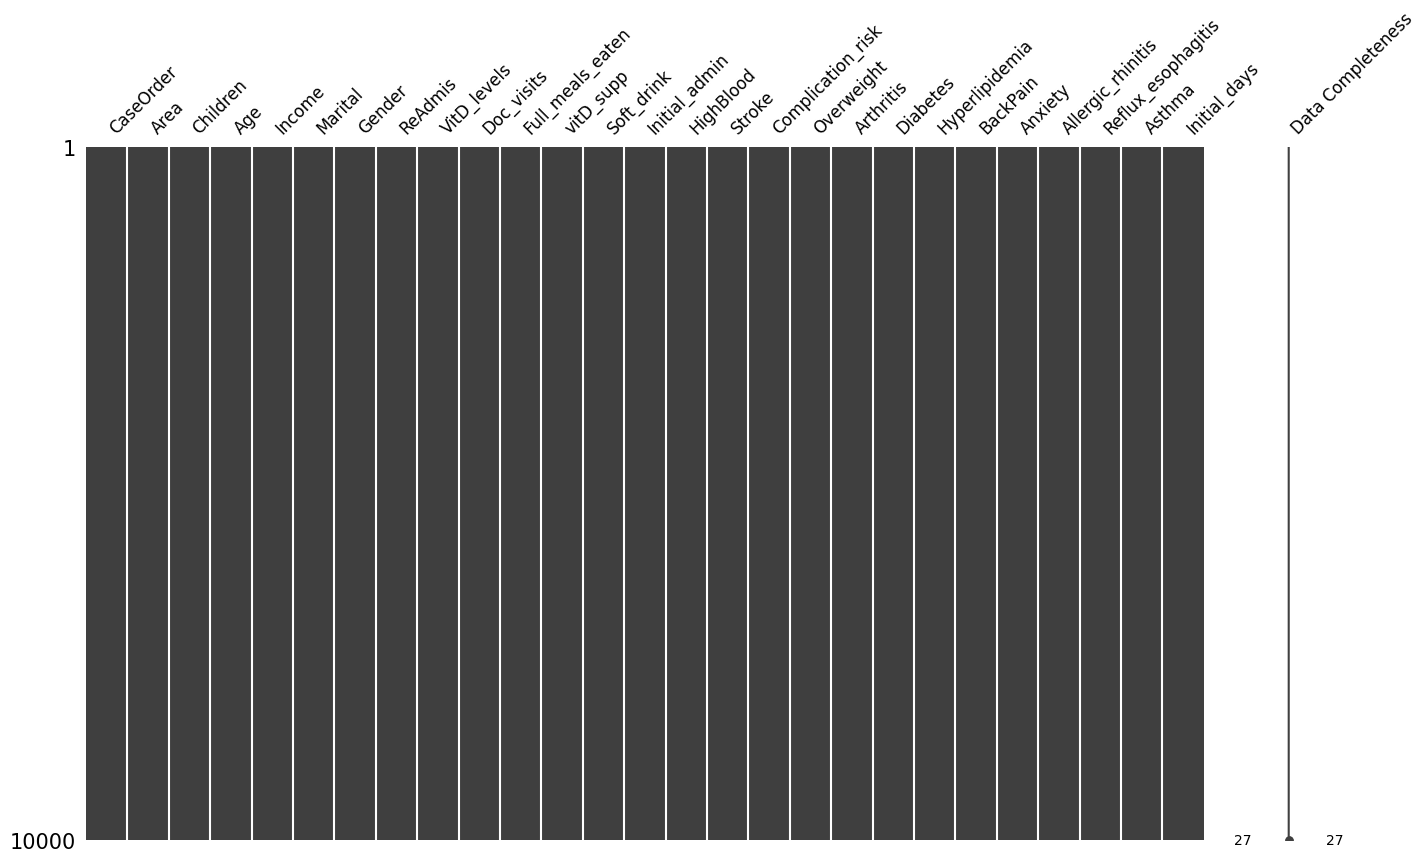

In [8]:
msg.matrix(data, figsize=(16,9), fontsize=12, labels=True)
missing_columns = data.isnull().sum()
print(missing_columns)

Check for Duplicate Data

In [9]:
data.duplicated().any()

np.False_

##Assumptions with Logistics Regression Modelling
- Independent variables are not overly correlated with each other
- The binary readmittance data (ReAdmis) will follow a Bernoulli distribution rather than a gaussian distribution
- The model will interpret the relationship between one dependent binary variable (ReAdmis) and one or many independent variables
- The model will predict the probability of a specific outcome occurring.

##Data Transformation
After intial data cleaning is completed, categorical variables will be hot encoded to conform with the data type standards to perform logistic regression. In addition, categorical variables with irrelevantly specific categories such as the different statuses of unmarried individuals found within the ‘Marital’ column, will be condensed as deemed relevant to the main research question.

Making these transformations is important for the process of creating the initial model, and ultimately, the final model as it will provide a larger surplus of variables which provides the flexibility to reduce various different combinations of variables to maintain certain performance benchmarks to best represent the original dataset while simplifying the final model.

Separate Columns by Data Category

In [10]:
categorical = ['ReAdmis', 'Area', 'Marital', 'Gender', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
continuous = ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days']

Simplify Marital Table to 'Married' and 'Unmarried'

In [11]:
data['Marital']=np.where(data['Marital'] != 'Married', 'Not_Married', data['Marital'])
data['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

##Univariate Variable Visualizations and Summary Statistics

###Categorical Data

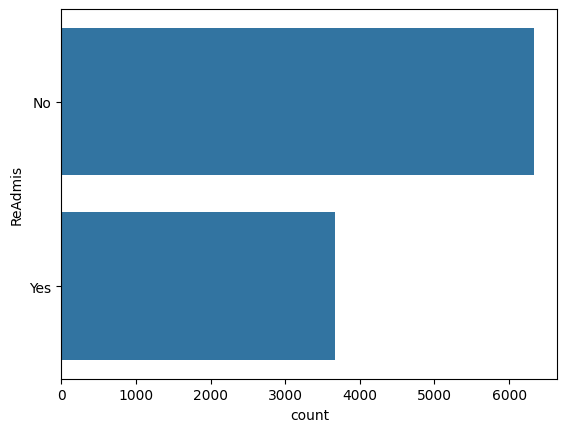

  ReAdmis  Count
0      No   6331
1     Yes   3669


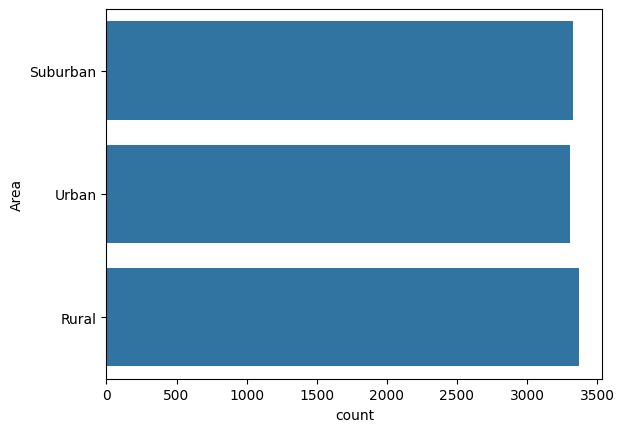

       Area  Count
0     Rural   3369
1  Suburban   3328
2     Urban   3303


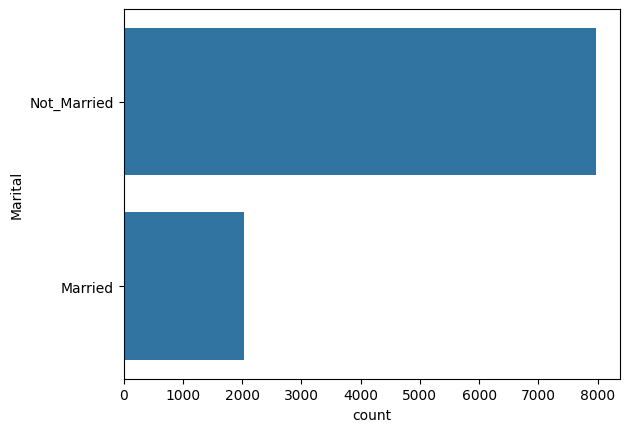

       Marital  Count
0      Married   2023
1  Not_Married   7977


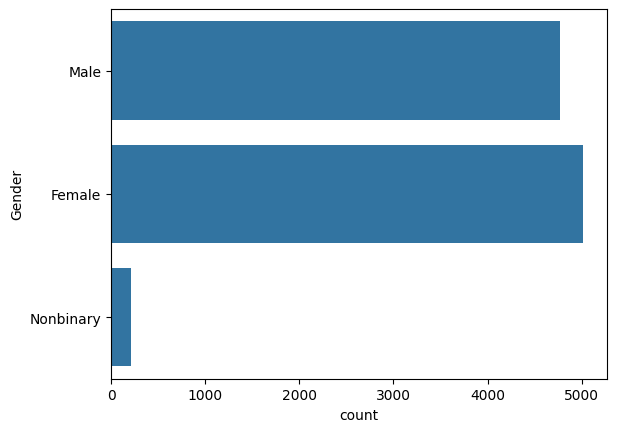

      Gender  Count
0     Female   5018
1       Male   4768
2  Nonbinary    214


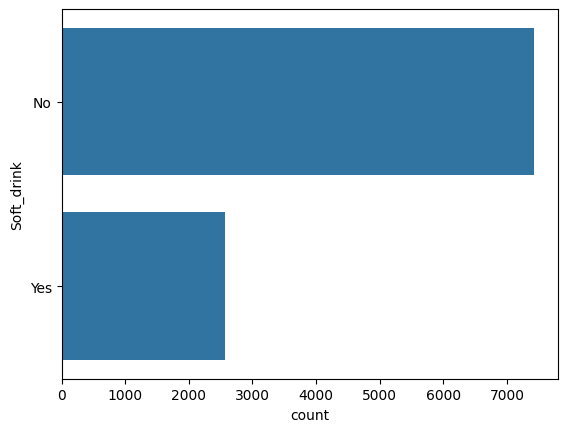

  Soft_drink  Count
0         No   7425
1        Yes   2575


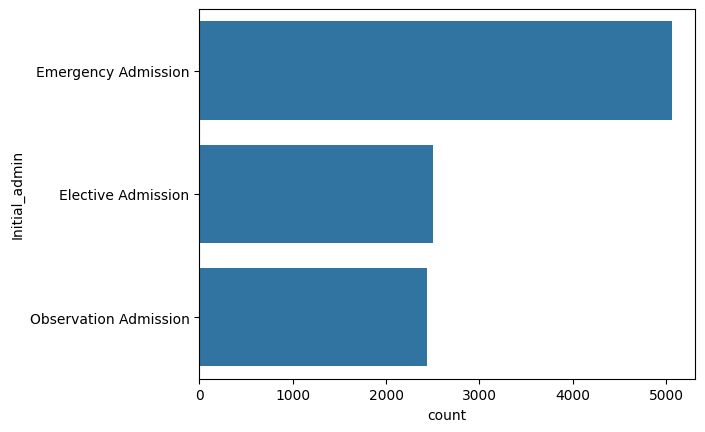

           Initial_admin  Count
0     Elective Admission   2504
1    Emergency Admission   5060
2  Observation Admission   2436


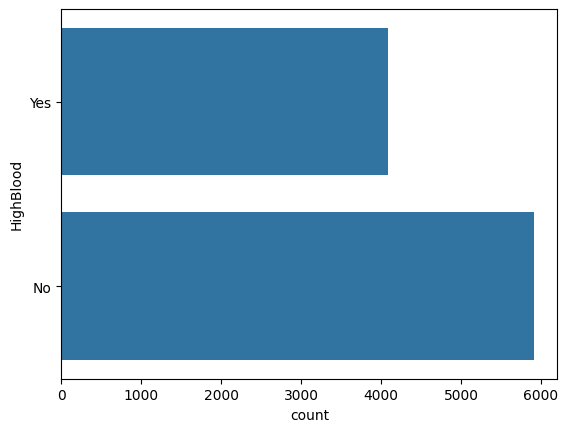

  HighBlood  Count
0        No   5910
1       Yes   4090


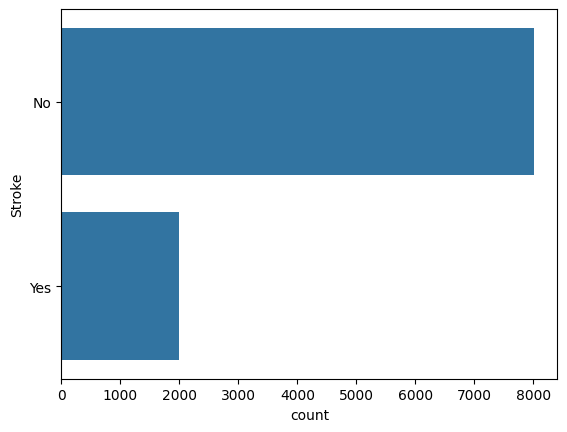

  Stroke  Count
0     No   8007
1    Yes   1993


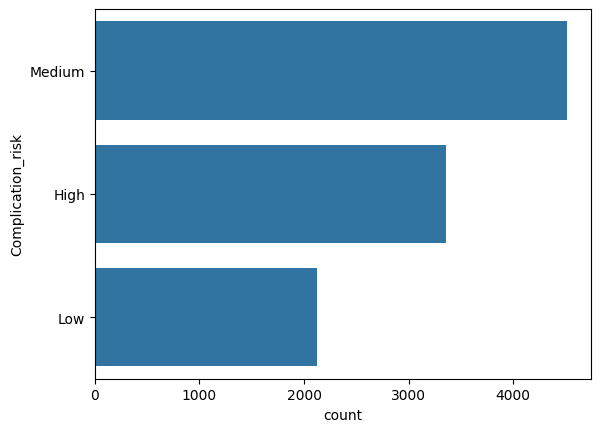

  Complication_risk  Count
0              High   3358
1               Low   2125
2            Medium   4517


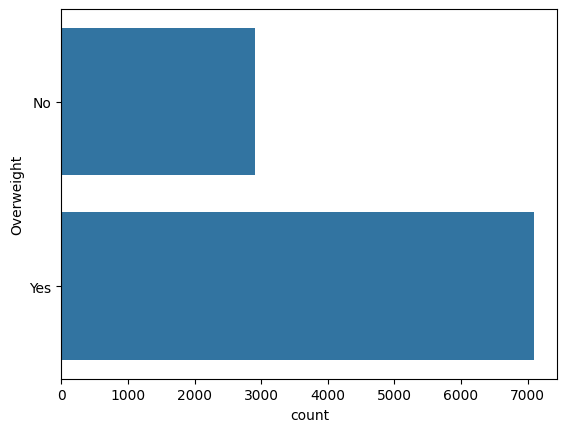

  Overweight  Count
0         No   2906
1        Yes   7094


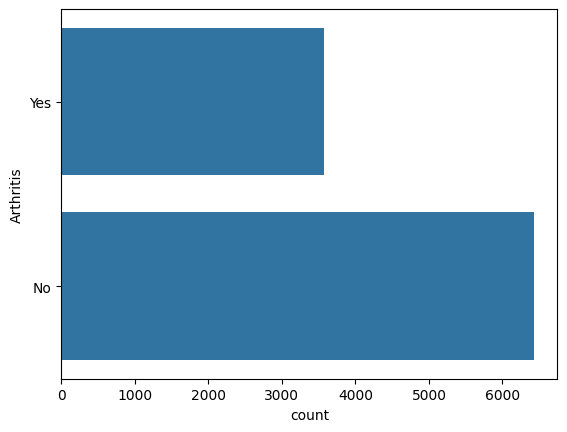

  Arthritis  Count
0        No   6426
1       Yes   3574


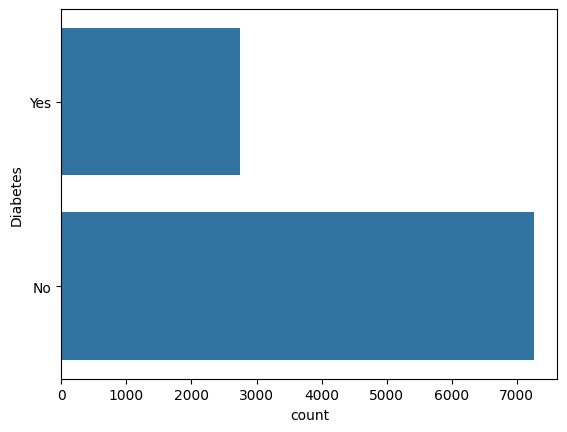

  Diabetes  Count
0       No   7262
1      Yes   2738


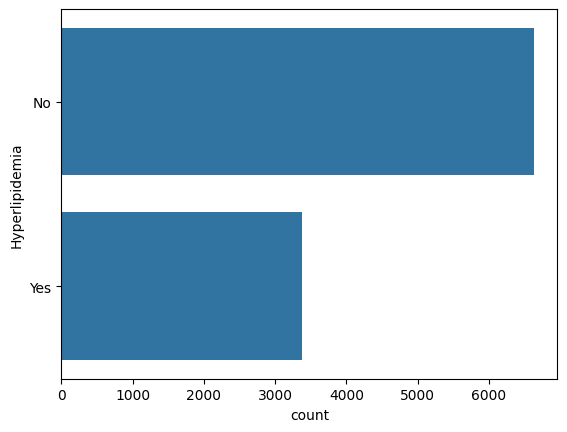

  Hyperlipidemia  Count
0             No   6628
1            Yes   3372


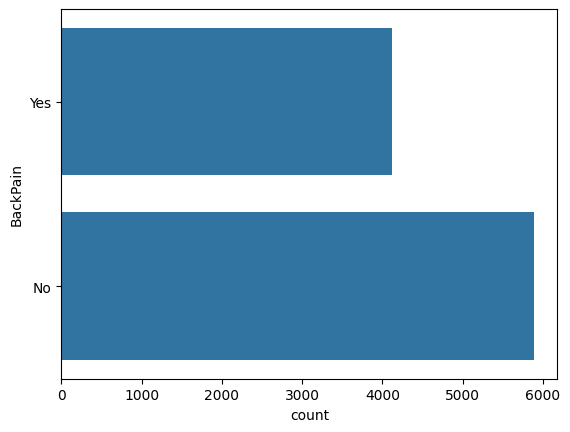

  BackPain  Count
0       No   5886
1      Yes   4114


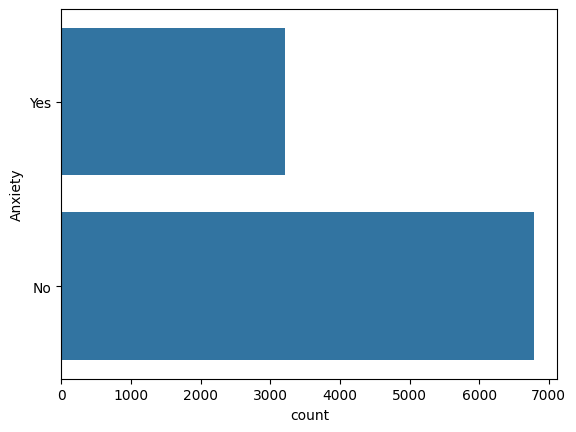

  Anxiety  Count
0      No   6785
1     Yes   3215


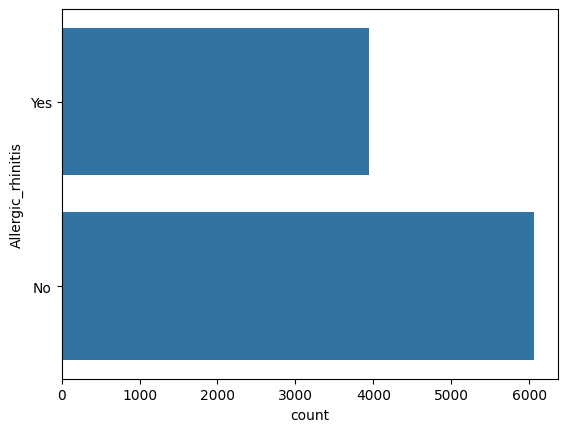

  Allergic_rhinitis  Count
0                No   6059
1               Yes   3941


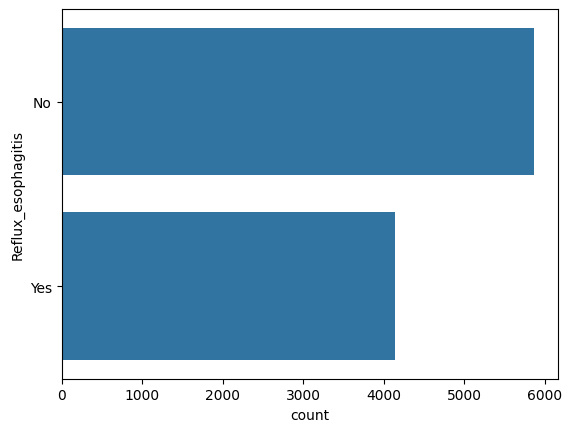

  Reflux_esophagitis  Count
0                 No   5865
1                Yes   4135


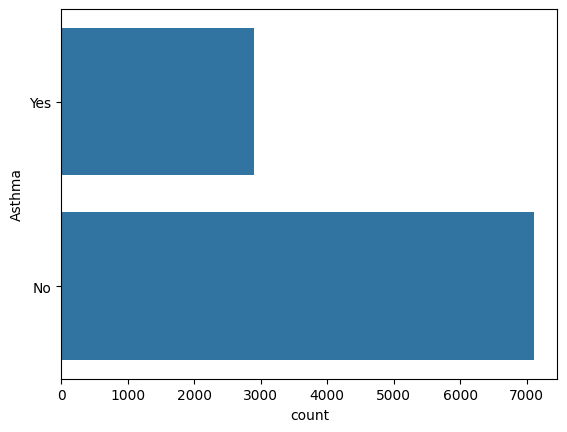

  Asthma  Count
0     No   7107
1    Yes   2893


In [12]:
for column in categorical:
  ax = sns.countplot(y=column, data=data)
  plt.show()
  print(data.groupby([column]).size().reset_index(name='Count'))

###Continuous Data

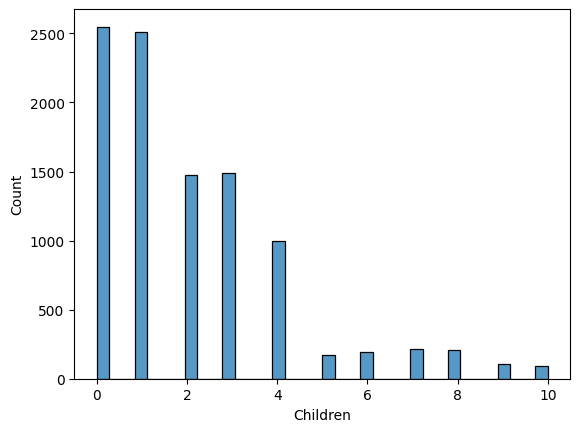

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64


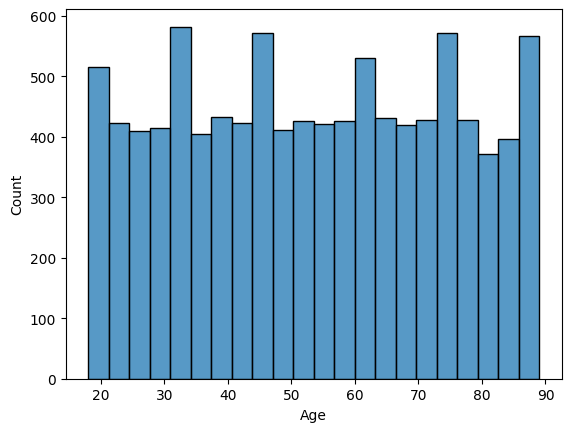

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


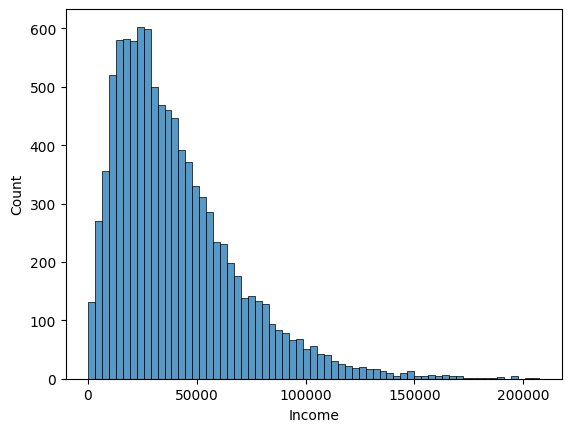

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


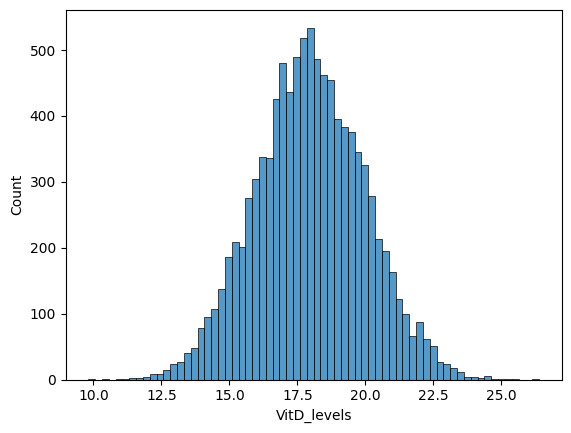

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


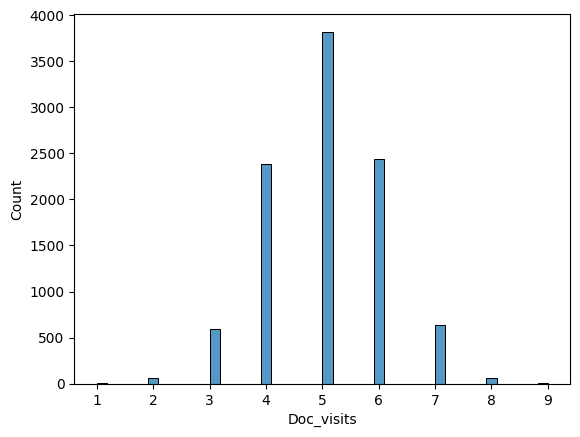

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64


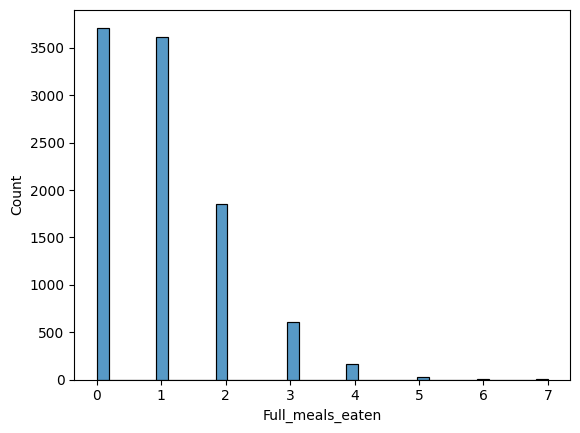

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64


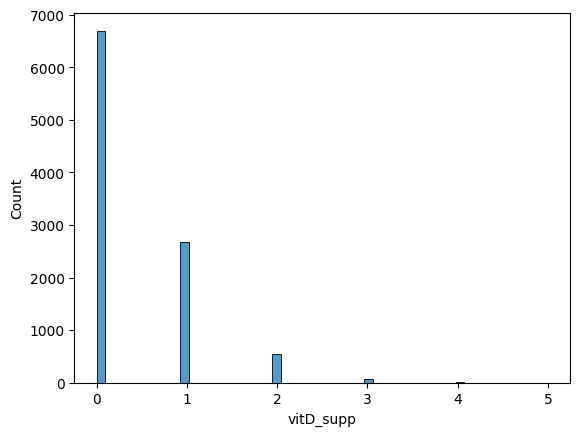

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64


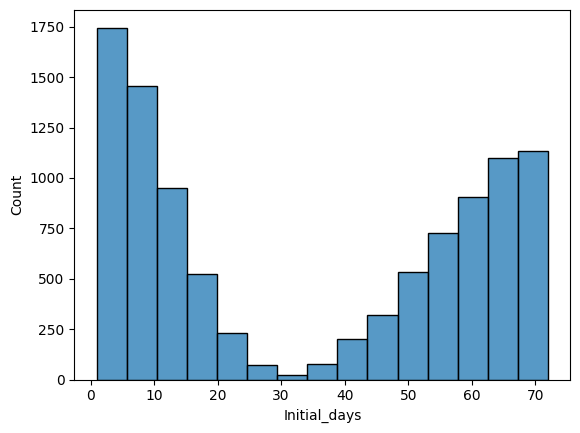

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


In [13]:
for column in data[continuous].columns:
  sns.histplot(data, x=column)
  plt.show()
  print(data[column].describe())

##Bivariate Data Visualizations against Patient Readmittance Status

###Categorical Data

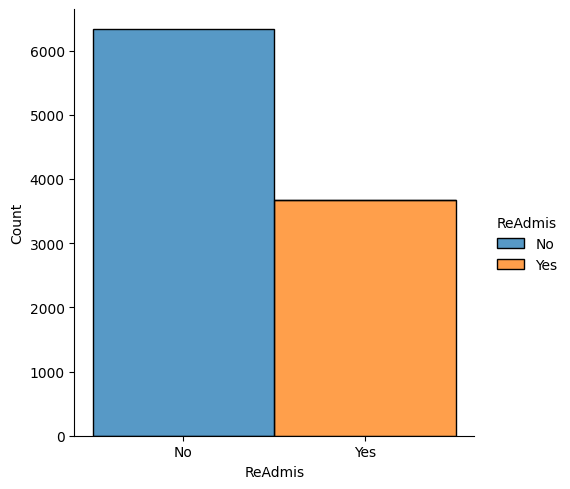

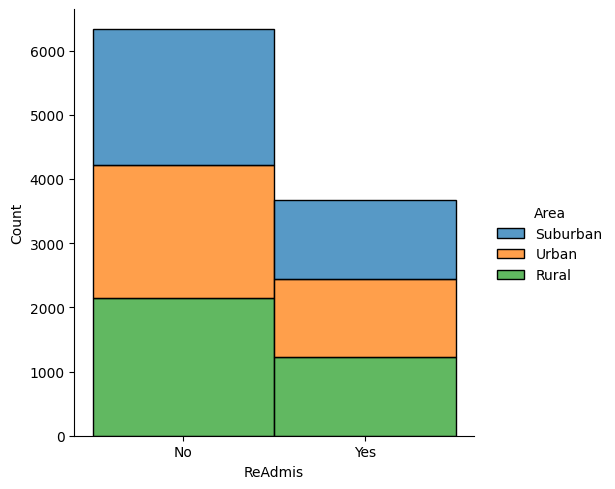

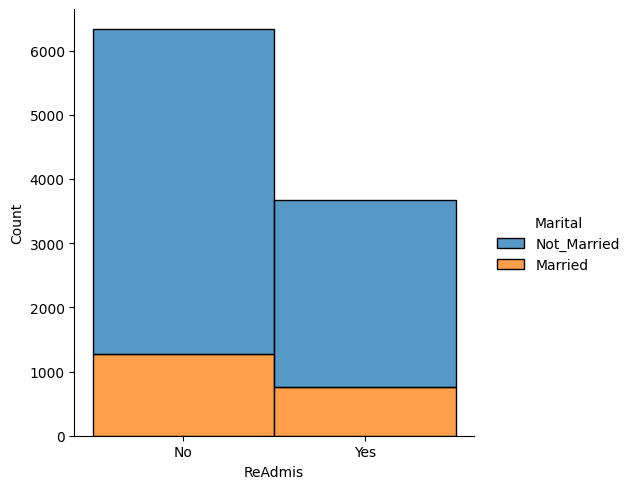

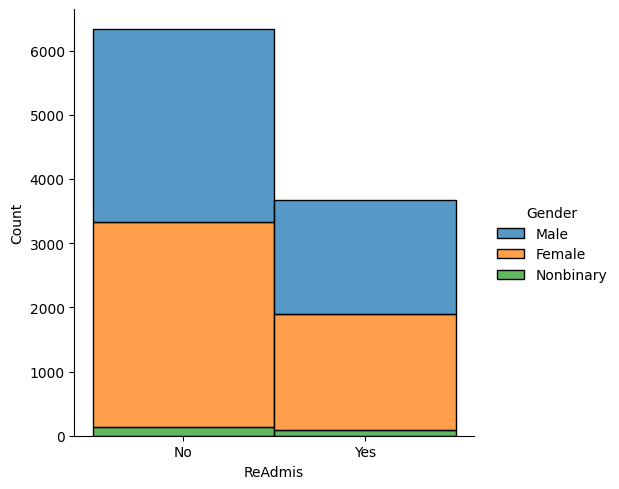

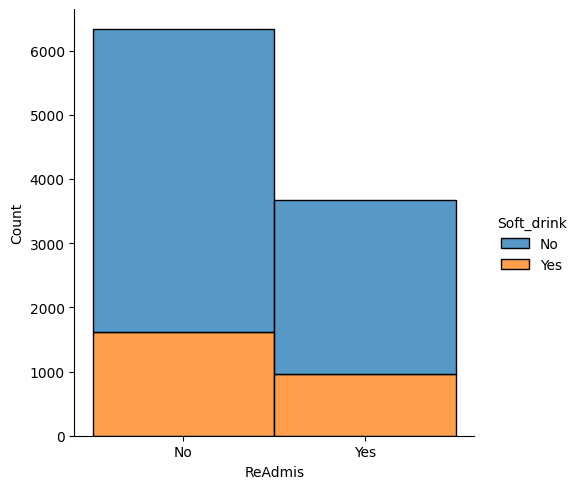

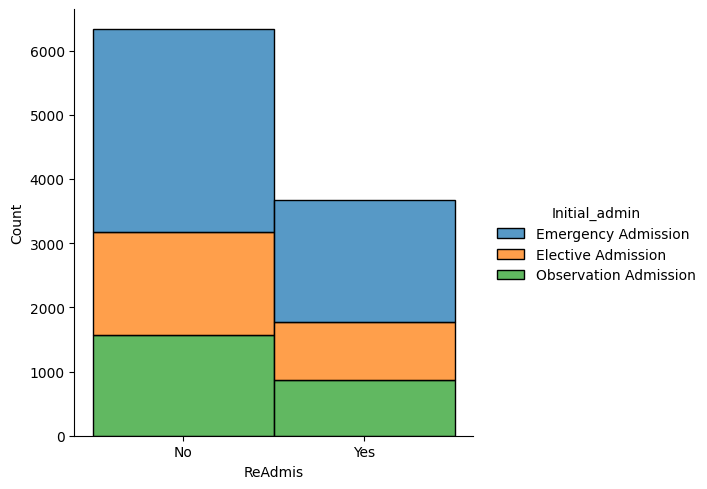

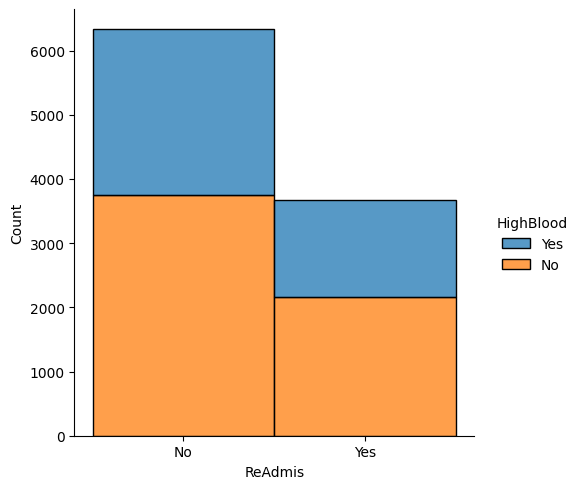

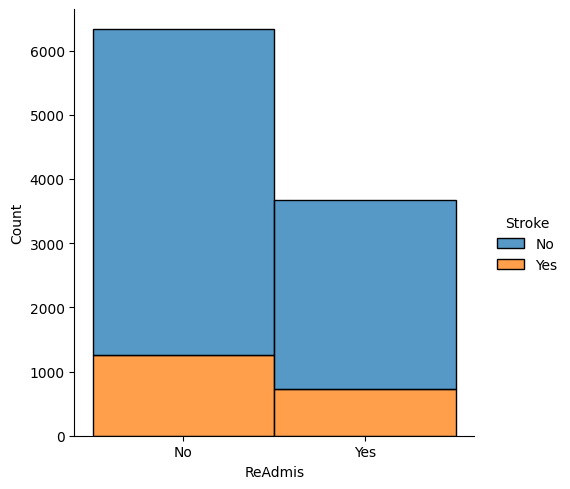

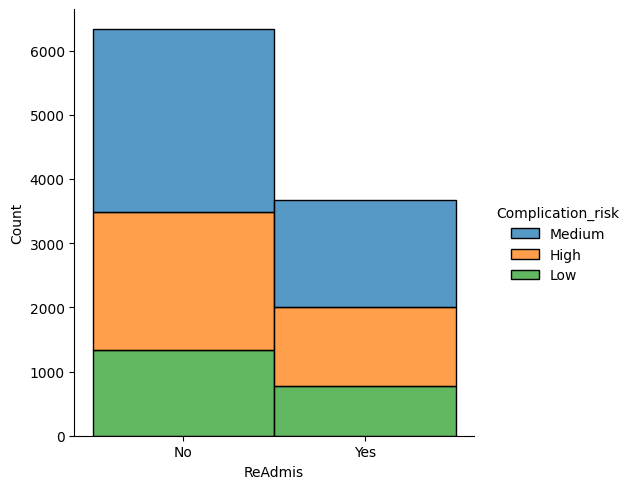

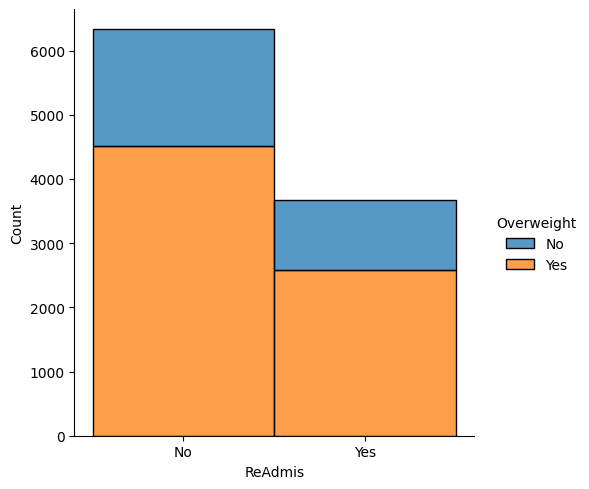

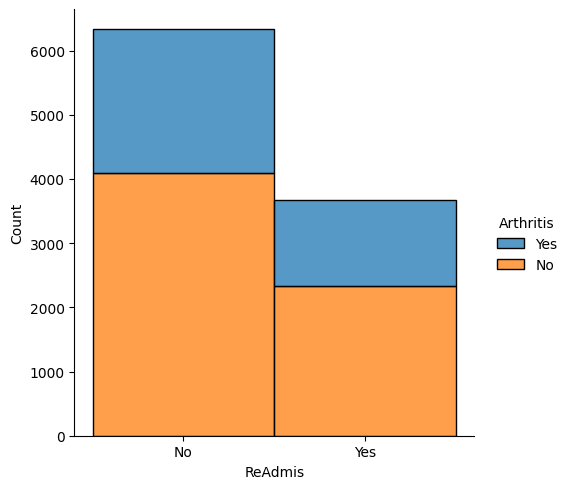

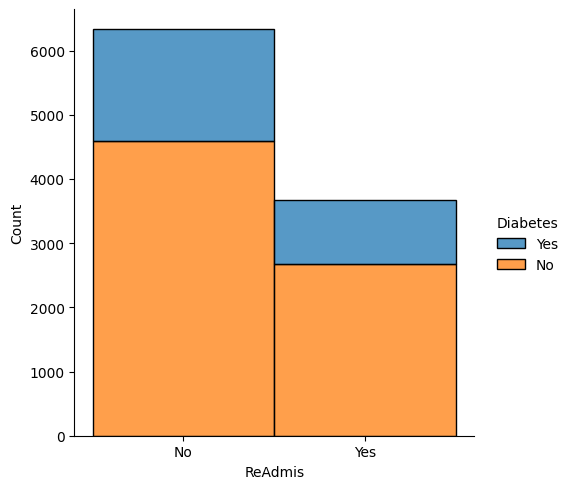

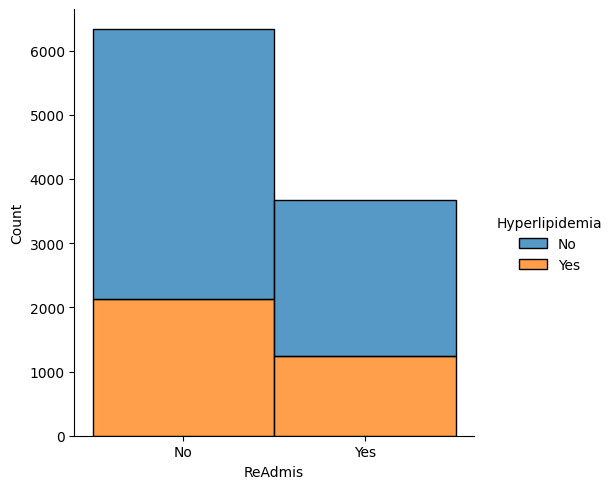

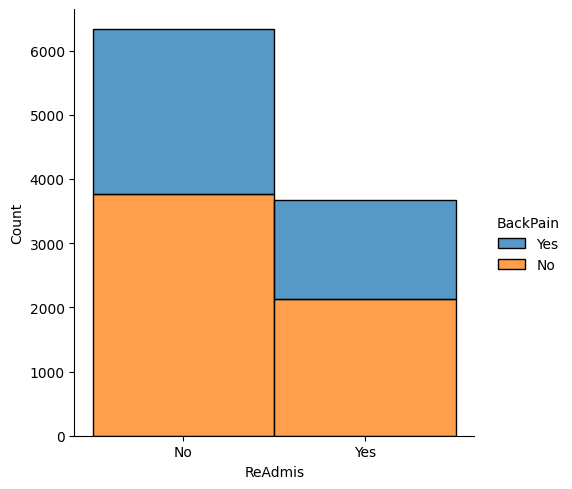

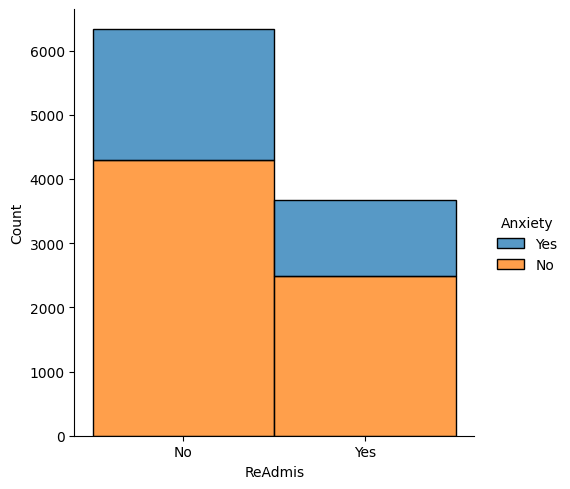

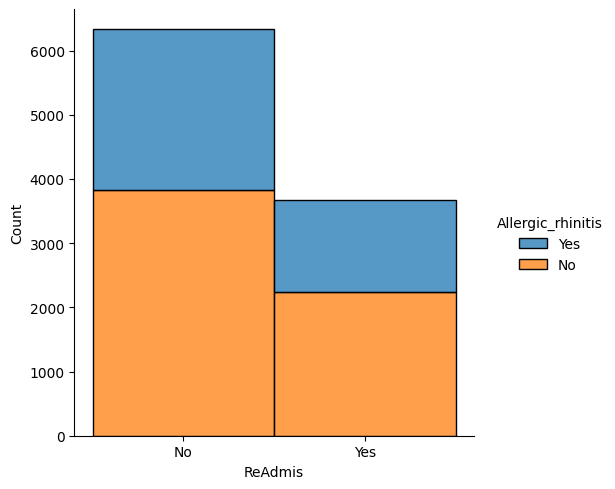

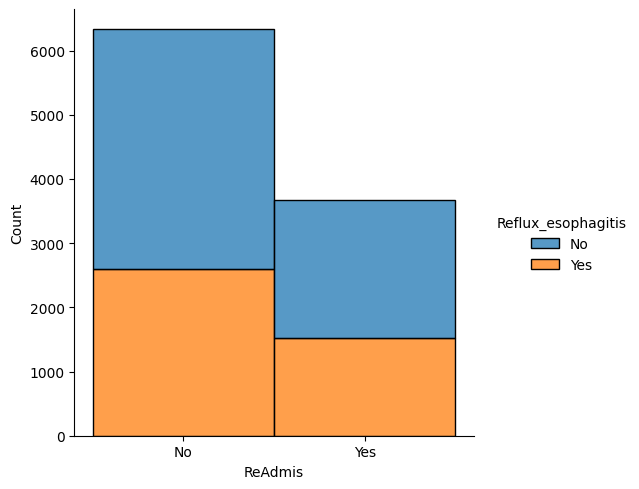

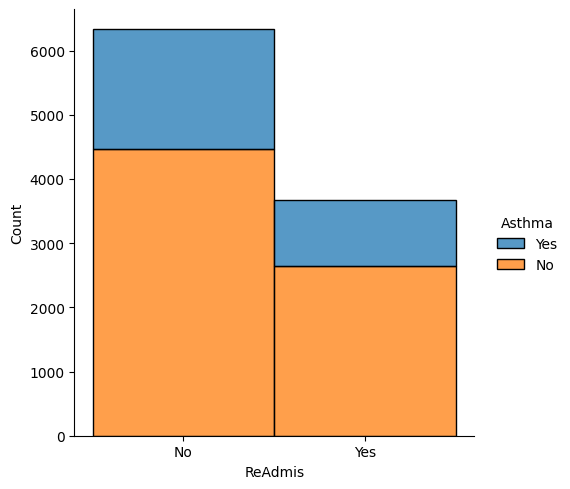

In [82]:
for column in categorical:
    sns.displot(data=data, x='ReAdmis', hue=column, multiple = 'stack')
    plt.show()

###Continuous Data

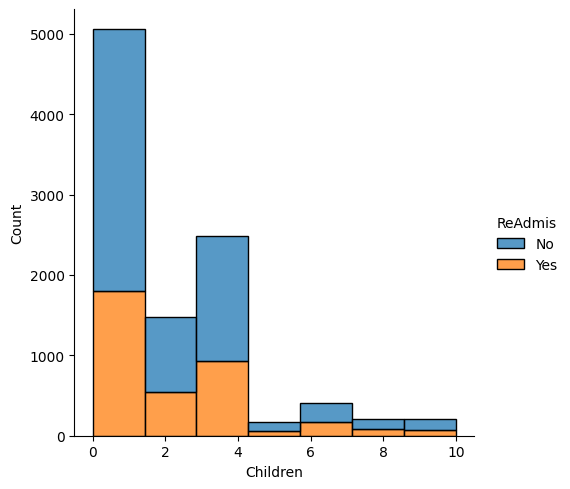

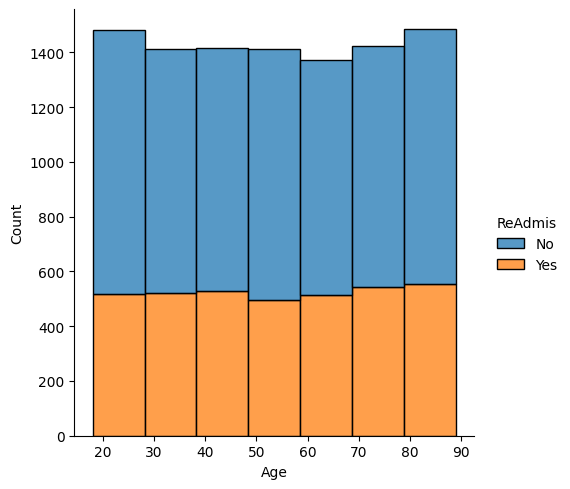

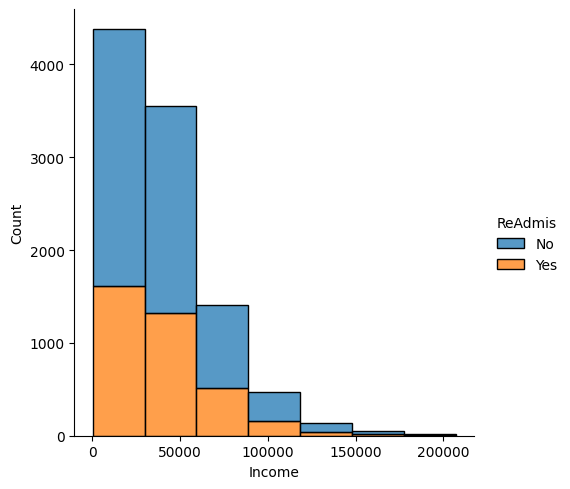

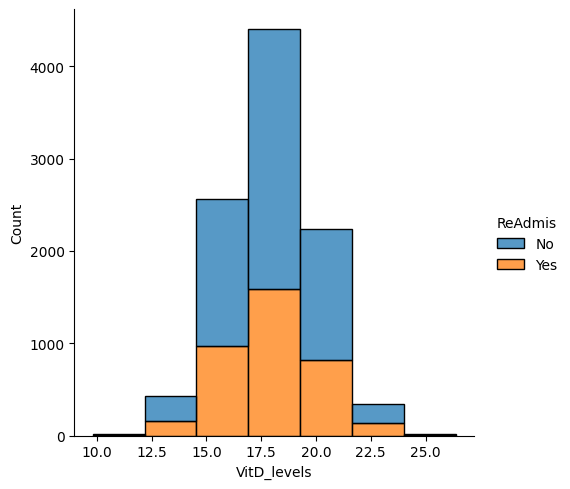

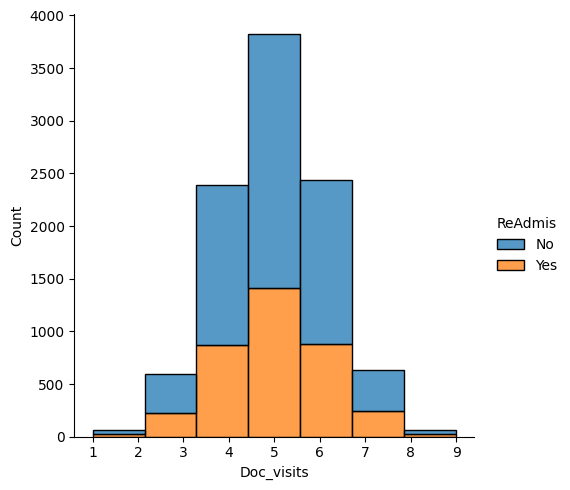

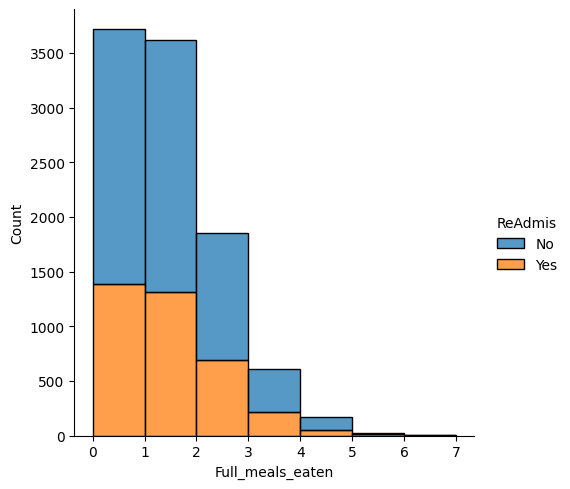

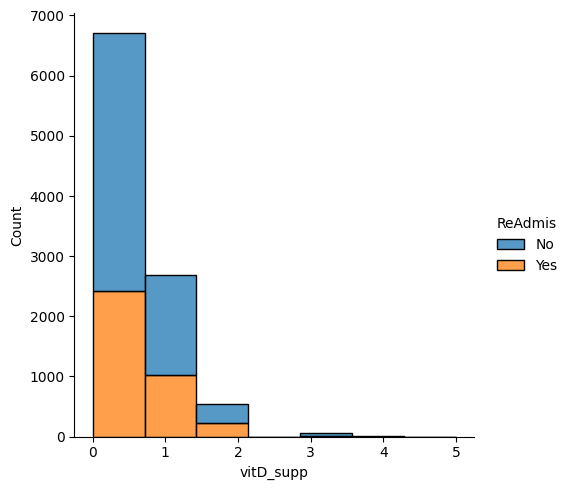

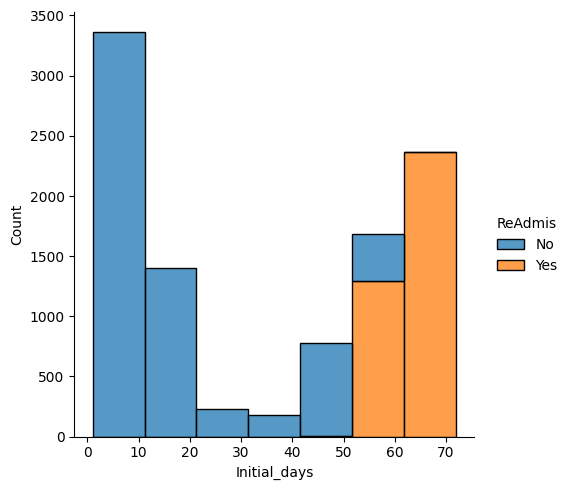

In [83]:
for column in continuous:
    sns.displot(data=data, x=column, hue='ReAdmis', multiple = 'stack', bins = 7)
    plt.savefig(column + '_Dplot.jpg')
    plt.show()

###Encode Categorical Columns to Numerical with One Hot Encoding

In [14]:
data = pd.get_dummies(data, columns = categorical, drop_first=True, dtype='int')
categorical = [
    'Area_Suburban',
    'Area_Urban',
    'Marital_Not_Married',
    'Gender_Male',
    'Gender_Nonbinary',
    'Soft_drink_Yes',
    'Initial_admin_Emergency Admission',
    'Initial_admin_Observation Admission',
    'HighBlood_Yes',
    'Stroke_Yes',
    'Complication_risk_Low',
    'Complication_risk_Medium',
    'Overweight_Yes',
    'Arthritis_Yes',
    'Diabetes_Yes',
    'Hyperlipidemia_Yes',
    'BackPain_Yes',
    'Anxiety_Yes',
    'Allergic_rhinitis_Yes',
    'Reflux_esophagitis_Yes',
    'Asthma_Yes'
    ]


###Save Cleaned and Transformed Dataset as 'medical_logistic.csv'


In [15]:
data.to_csv('medical_logistic.csv')

##Initial Logisitc Model

###Split dataset into 30% Testing Data and 70% Training Data

In [16]:
X = sm.add_constant(data[categorical + continuous])
y = data['ReAdmis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)

###Create Initial Model with Training Datasets

In [17]:
initial_logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.032965
         Iterations 14


###Initial Model Summary

In [18]:
initial_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ReAdmis_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6970
Method:                           MLE   Df Model:                           29
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.9498
Time:                        23:28:37   Log-Likelihood:                -230.76
converged:                       True   LL-Null:                       -4600.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -84.2159      5.883    -14.315      0.000     -95.746     -72.685
Area_Suburban                          -0.1439      0.304     -0.473      0.636      -0.740       0.452
Area_Urban                             -0.3784      0.320     -1.181      0.237      -1.006       0.249
Marital_Not_Married                     0.4153      0.290      1.430      0.153      -0.154       0.984
Gender_Male                             0.0497      0.250      0.199      0.842      -0.440       0.540
Gender_Nonbinary                        1.0097      0.936      1.079      0.280      -0.824       2.843
Soft_drink_Yes                          0.4507      0.278      1.621      0.105      -0.094       0.996
Initial_admin_Emergency Admission       2.8633      0.347      8.245      0.000       2.183       3.544
Initial_admin_Observation Admission     0.6724      0.333      2.022      0.043       0.021       1.324
HighBlood_Yes                           1.0324      0.265      3.899      0.000       0.513       1.551
Stroke_Yes                              1.6410      0.330      4.967      0.000       0.994       2.289
Complication_risk_Low                  -1.8090      0.354     -5.106      0.000      -2.503      -1.115
Complication_risk_Medium               -0.1715      0.280     -0.612      0.541      -0.721       0.378
Overweight_Yes                          0.0002      0.274      0.001      0.999      -0.537       0.538
Arthritis_Yes                          -1.6404      0.284     -5.766      0.000      -2.198      -1.083
Diabetes_Yes                            0.7000      0.278      2.515      0.012       0.155       1.245
Hyperlipidemia_Yes                      0.2459      0.257      0.957      0.338      -0.258       0.749
BackPain_Yes                            0.4158      0.251      1.656      0.098      -0.076       0.908
Anxiety_Yes                            -1.1467      0.274     -4.184      0.000      -1.684      -0.610
Allergic_rhinitis_Yes                  -0.3489      0.252     -1.385      0.166      -0.843       0.145
Reflux_esophagitis_Yes                 -0.1892      0.256     -0.741      0.459      -0.690       0.312
Asthma_Yes                             -1.2532      0.276     -4.548      0.000      -1.793      -0.713
Children                                0.1044      0.054      1.922      0.055      -0.002       0.211
Age                                     0.0085      0.006      1.472      0.141      -0.003       0.020
Income                               4.276e-06   4.31e-06      0.993      0.321   -4.16e-06    1.27e-05
VitD_levels                             0.0082      0.059      0.140      0.888      -0.107       0.123
Doc_visits                             -0.0502      0.116     -0.433      0.665      -0.277       0.177
Full_meals_eaten                        0.0645      0.126      0.512      0.609      -0.182       0.311
vitD_supp        

### Confusion Matrix

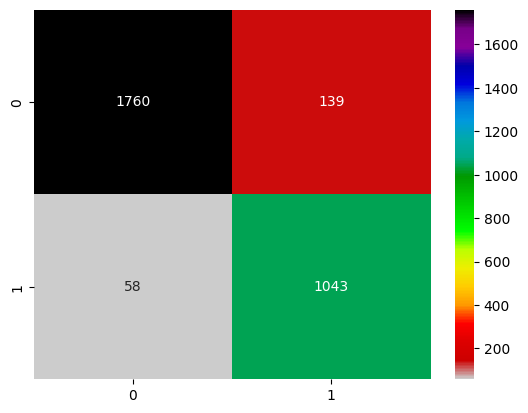

In [19]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
predicted = lgr.predict(X_test)
confusion = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=predicted), index=range(2),columns=range(2))
axes = sns.heatmap(confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

###Prediction Statistics

In [20]:
correct = sum(np.diagonal(confusion))
total = confusion.values.sum()
incorrect = total - correct
print('Correct predictions (True Positive, True Negatives): {} ({:.0%})'.format(correct, correct / total))
print('Incorrect predictions (False Positives, False Negatives): {} ({:.0%})'.format(incorrect, incorrect / total))

Correct predictions (True Positive, True Negatives): 2803 (93%)
Incorrect predictions (False Positives, False Negatives): 197 (7%)


###Accuracy Calculations

In [21]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1899
           1       0.88      0.95      0.91      1101

    accuracy                           0.93      3000
   macro avg       0.93      0.94      0.93      3000
weighted avg       0.94      0.93      0.93      3000



###Receiver Operating Characteristic Area Under Curve Graph

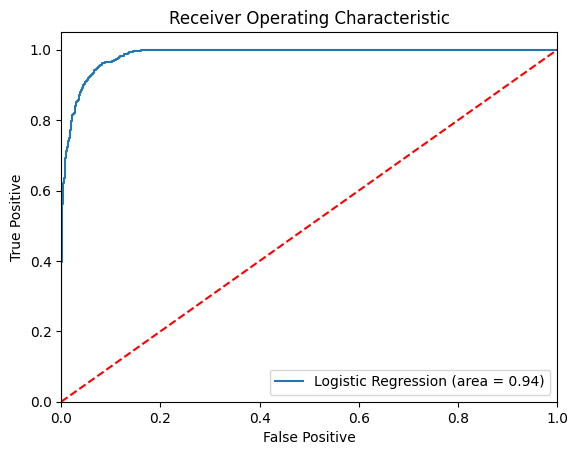

In [22]:
logit_roc_auc = roc_auc_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


##Initial Model Analysis

With a receiver operating characteristic of .94, we can conclude that this intial logistic regression model is capable of accurately predicting a patients readmission status 94% of the time. This can be cross referenced with the information gathered from the accuracy score calculations derived from the confusion matrix which tells us that the model boasts a 93% prediction accuracy.

For reference, a score of 50% would be equivalent to randomly guessing the readmission status of every patient. Therefore, a 94% is a fantastic score for the intital model, however, this initial model does use all 29 of the relevant predictor variables to achieve this statistic.

This leads to the next step, where the goal is to maintain the high prediction accuracy of the intial model, but with as little predictor variables as possible in order to bring clarity to which predictors are most relevant to influencing a patients possibility of being readmitted.


##Reduced Logisitic Model

To accomplish the task, the RFE feature selection tool from sklearn will determine an optimal number of features for the reduced model. Afterwhich, the SelectKBest tool will determine the best features that should be included. The primary criteria used to assess optimal variables will be their P-values by means the ‘f_regression’ parameter within the SelectKBest tool. After implementing these steps to create a reduced variable set, the data will be split and used to train and assess the final reduced logistic regression model.

###Determine optimal number of features

In [23]:
model = LogisticRegression()
rfe = RFE(model)
rfe.fit(X, y)
n_features = rfe.n_features_
n_features

np.int64(15)

###Select optimal number of best features

In [24]:
X_reduced = sm.add_constant(SelectKBest(f_regression, k = n_features).set_output(transform='pandas').fit_transform(X, y))


###Resplit data with reduced feature set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y,test_size=0.3, random_state=0, stratify=y)

###Fit new model

In [26]:
reduced_logreg = sm.Logit(y_train,X_train).fit()
reduced_logreg.summary()

Optimization terminated successfully.
         Current function value: 0.039840
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            ReAdmis_Yes   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6984
Method:                           MLE   Df Model:                           15
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                  0.9394
Time:                        23:29:02   Log-Likelihood:                -278.88
converged:                       True   LL-Null:                       -4600.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -68.1725      4.231    -16.114      0.000     -76.464     -59.881
Area_Urban                             -0.1765      0.229     -0.772      0.440      -0.625       0.272
Gender_Male                             0.0374      0.220      0.170      0.865      -0.394       0.469
Soft_drink_Yes                          0.3048      0.252      1.209      0.227      -0.189       0.799
Initial_admin_Emergency Admission       2.4695      0.303      8.162      0.000       1.876       3.062
Initial_admin_Observation Admission     0.6519      0.299      2.178      0.029       0.065       1.239
Overweight_Yes                          0.1486      0.241      0.616      0.538      -0.324       0.622
Arthritis_Yes                          -1.2048      0.240     -5.031      0.000      -1.674      -0.735
BackPain_Yes                            0.2154      0.222      0.970      0.332      -0.220       0.651
Asthma_Yes                             -1.0642      0.248     -4.298      0.000      -1.550      -0.579
Children                                0.1084      0.048      2.268      0.023       0.015       0.202
Age                                     0.0058      0.005      1.114      0.265      -0.004       0.016
Income                               3.219e-06   3.96e-06      0.814      0.416   -4.53e-06     1.1e-05
Full_meals_eaten                        0.0739      0.115      0.643      0.520      -0.151       0.299
vitD_supp                              -0.1503      0.176     -0.852      0.394      -0.496       0.195
Initial_days                            1.2287      0.076     16.179      0.000       1.080       1.378
=======================================================================================================

Possibly complete quasi-separation: A fraction 0.79 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###Reduced Model Confusion Matrix

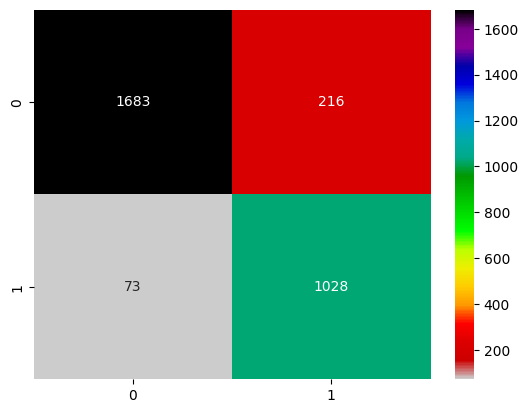

In [27]:
reduced_lgr = LogisticRegression()
reduced_lgr.fit(X_train, y_train)
reduced_predicted = reduced_lgr.predict(X_test)
reduced_confusion = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=reduced_predicted), index=range(2),columns=range(2))
axes = sns.heatmap(reduced_confusion, annot=True,cmap='nipy_spectral_r', fmt='g')

###Reduced Model Prediction Statistics

In [28]:
reduced_correct = sum(np.diagonal(reduced_confusion))
reduced_incorrect = total - reduced_correct
print('Correct predictions (True Positive, True Negatives): {} ({:.0%})'.format(reduced_correct, reduced_correct / total))
print('Incorrect predictions (False Positives, False Negatives): {} ({:.0%})'.format(reduced_incorrect, reduced_incorrect / total))

Correct predictions (True Positive, True Negatives): 2711 (90%)
Incorrect predictions (False Positives, False Negatives): 289 (10%)


### Reduced Model Accuracy Calculation

In [29]:
print(classification_report(y_test, reduced_predicted))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1899
           1       0.83      0.93      0.88      1101

    accuracy                           0.90      3000
   macro avg       0.89      0.91      0.90      3000
weighted avg       0.91      0.90      0.90      3000



### Reduced Model Receiver Operating Characteristic Area Under Curve Graph

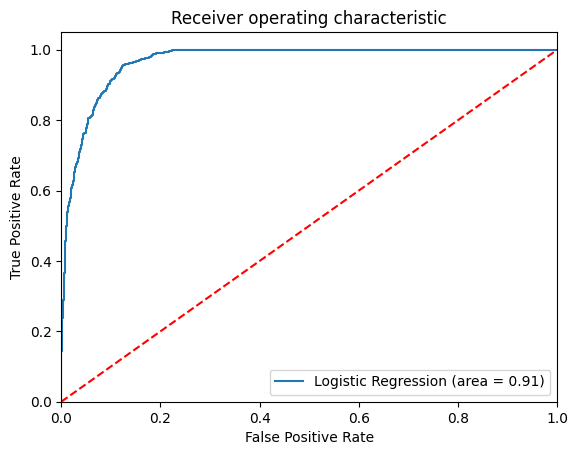

In [30]:
logit_roc_auc = roc_auc_score(y_test, reduced_predicted)
fpr, tpr, thresholds = roc_curve(y_test, reduced_lgr.predict_proba(X_test)
[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (Area = %0.2f)' %logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##Reduced Model Analysis
Comparing the two models based on their AUC value and accuracy score, the initial model had an AUC value of .94 and an accuracy score of 93%, while the reduced model produced an AUC value of .88, and an accuracy score of 90%. Although this is about a 5-6% decrease in accuracy, the fact that the final model only requires 15 predictors instead of 29 greatly outweighs the minor drop in prediction accuracy.

The statistical and practical significance of this model is that the hospital will be able to more accurately focus their efforts on patients who are more likely to readmit, as well as which resources are most critical to reducing their chances of being readmitted.

## Model Limitations
Key limitations of the data analysis is that although this model has been streamlined, it is possible that these remaining variables still do not communicate enough of the many minute nuances that come with the health history of patients. With humans already being extremely biologically complex as well as other factors such as social and financial status, these nuances undoubtably play a relevant role in the research question being pursued, but were either not included in this dataset, or are simplyt aspects of a patients background that are not viably quantifiable. Furthermore, the model is ultimately at the mercy of the healthcare professional's ability to accurately diagnose their patients in the first place.

The conclusions that have been drawn from this research most definetly need to be taken with a grain of salt as the complexity of what is being explored surely is greater than the model that was created.
